In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def transpose(x):
    m = len(x)
    n = len(x[0])
    
    x_t = []
    for i in range(n):
        temp = []
        for j in range(m):
            temp.append(x[j][i])
        x_t.append(temp)
    return x_t

def normalize(x, nominator):
    return x/nominator*0.99 + 0.01

In [33]:
# X = 5 * 2 matrix
X = [[10, 45, 10, 15, 23, 33],
    [9, 46, 2, 10, 22, 37],
    [5, 6, 2, 7, 10, 90],
    [1, 8, 10, 20, 25, 70],
    [36, 70, 60, 44, 50, 1]]

# normalize x
for i in range(len(X)):
    for j in range(len(X[i])):
        X[i][j] = normalize(X[i][j], 90)

# Y = 5 * 3 matrix
Y = [[1, 0, 0],
    [1, 0, 0],
    [0, 1, 0],
    [0, 1, 0],
    [0, 0, 1]]

In [34]:
# W = 3 * 2 matrix
W = [[random.random(), random.random(), random.random(), random.random(), random.random(), random.random()],
    [random.random(), random.random(), random.random(), random.random(), random.random(), random.random()],
    [random.random(), random.random(), random.random(), random.random(), random.random(), random.random()]]

## Modulize
train single classifier

In [35]:
def calc_hypo(w, x):
    arguments = len(w)
    points = len(x)
    
    H = []
    for n in range(points):
        h = 0
        for m in range(arguments):
            h += w[m] * x[n][m]
        H.append(sigmoid(h))
    
    return H

h = calc_hypo(W[0], X)
print(h)

[0.6763225592139659, 0.6747500074174524, 0.6556285741428117, 0.6494512978214633, 0.7734172108073158]


In [36]:
def calc_cost(H, Y):
    costs = []
    for i in range(len(Y)):
        costs.append(-Y[i]*np.log(H[i]) - (1-Y[i])*np.log(1-H[i]))
    return sum(costs) / len(costs)

c = calc_cost(h, transpose(Y)[0])
print(c)

0.8766866338444308


In [37]:
def calc_grad(w, X, y, h, c, lr, d):
    grad = []
    for i in range(len(w)):
        w_ = []
        for j in range(len(w)):
            if i == j:
                w_.append(w[j] + d)
            else:
                w_.append(w[j])
        #print(w_)
        h_ = calc_hypo(w_, X)
        c_ = calc_cost(h_, y)
        #print(c_)
        #print(c)
        g = c_ - c
        grad.append(g)
    
    w_new = []
    for i in range(len(w)):
        w_new.append(w[i] - (grad[i] * lr))
    
    return w_new

print(W[0])
w_new = calc_grad(W[0], X, transpose(Y)[0], h, c, 0.01, 1e-9)
print(w_new)
h_new = calc_hypo(w_new, X)
c_new = calc_cost(h_new, transpose(Y)[0])
w_new2 = calc_grad(w_new, X, transpose(Y)[0], h_new, c_new, 0.01, 1e-9)
print(w_new2)

[0.753773843387668, 0.6214966116228606, 0.24715483540568928, 0.0028345159599759695, 0.463847028263944, 0.48382738610655185]
[0.753773843387076, 0.6214966116220897, 0.24715483540455357, 0.0028345159589903547, 0.4638470282628844, 0.4838273861047077]
[0.753773843386484, 0.6214966116213188, 0.24715483540341787, 0.00283451595800474, 0.4638470282618248, 0.4838273861028636]


In [38]:
def train(W, X, Y, learn_rate, max_iter, diff=1e-9):
    # W = 3 * 2
    # X = 5 * 2
    # Y = 5 * 3
    
    # Result W
    res_W = []
    
    Y_t = transpose(Y)    # 3 * 5
    
    # Y_t = 3 * 5
    nOfModel = len(W)
    
    # 모델 별로 훈련함
    for i in range(nOfModel):
        w = W[i]     # [w, w]
        y = Y_t[i]   # [y, y, y, y, y]
        
        for j in range(max_iter):
            # Hypothesis
            h = calc_hypo(w, X)    # [h, h, h, h, h]

            # cost
            c = calc_cost(h, y)

            if (c < 0.0001):
                break
            
            # gradient
            w = calc_grad(w, X, y, h, c, learn_rate, diff)
        res_W.append(w)
    
    print(res_W)

train(W, X, Y, 0.01, 10000)

[[0.7537738374679588, 0.621496603913472, 0.24715482404866285, 0.0028345061038160483, 0.4638470176679754, 0.48382736766500106], [0.27930932457459634, 0.9410431791928543, 0.06604787656843326, 0.1801690608651766, 0.31199015291855803, 0.4158921497009196], [0.3357280768654286, 0.6475962488316133, 0.8413035572944294, 0.5409722463059273, 0.8314664479615701, 0.043239355687602746]]


In [24]:
def softmax(W, data):
    result = [0 for i in range(len(W))]
    
    e_arr = []
    
    # hypothesis function
    for i in range(len(W)):
        temp = 0
        for j in range(len(data)):
            temp += W[i][j] * data[j]
        e_arr.append(temp)
    
    # exponential function
    for i in range(len(e_arr)):
        e_arr[i] = np.exp(e_arr[i])
    
    # softmax
    for i in range(len(e_arr)):
        result[i] = e_arr[i] / sum(e_arr)
    
    return result

sm = softmax(W, [5, 5])
print(sm)

[0.8308650971934588, 0.04223961225390603, 0.12689529055263515]


In [32]:
normalize(260, 100)

2.5839999999999996

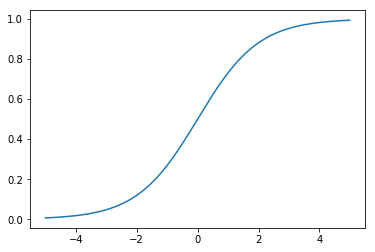

In [43]:
plt.plot([x/100 for x in range(-500, 500)], [sigmoid(x/100) for x in range(-500, 500)])

In [44]:
sigmoid(5)

0.9933071490757153